# Density 
Script to calculate the column density and volume densities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.units as u
import astropy.constants as const

In [2]:
file_msd = './data/msd_reprojected.fits'
hdu_msd = fits.open(file_msd)
data_msd = hdu_msd[0].data
header_msd = hdu_msd[0].header

In [25]:
def convert_surface_density_to_column(Sigma):
    """
    Convert a mass surface density (in g/cm^2) to an H2 column density (in cm^-2).

    Parameters
    ----------
    Sigma : astropy.units.Quantity
        Surface density in units of g/cm^2.
    
    Returns
    -------
    N_H2 : astropy.units.Quantity
        H2 column density in units of 1/cm^2.
    """
    # Mass of hydrogen atom
    m_H = const.m_p.to('g')
    # Mean molecular weight per H2 molecule (accounting for He and metals)
    mu = 2.8
    # Calculate column density
    N_H2 = Sigma / (mu * m_H)
    return N_H2.to(1/u.cm**2)

# Usage:
Sigma = data_msd * u.g / u.cm**2  # for example, 0.1 g/cm^2
N_H2 = convert_surface_density_to_column(Sigma)

/var/folders/3y/cmsgt3_x7x72bbs__zhy_q6h0008wr/T/ipykernel_17333/2743716108.py:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(N_H2.value.flatten()), bins=100, range=(21, 23))


Text(0, 0.5, 'Number of pixels')

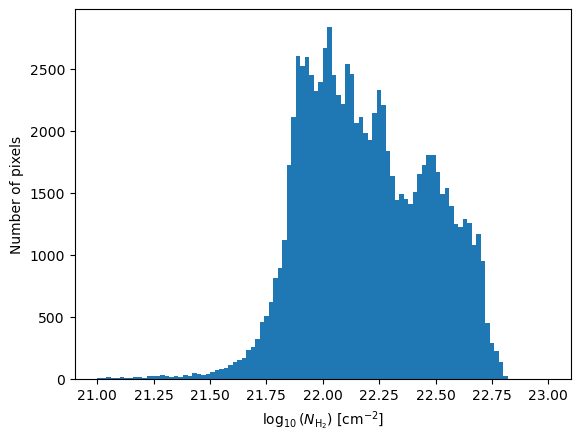

In [26]:
# plot histogram of values
plt.hist(np.log10(N_H2.value.flatten()), bins=100, range=(21, 23))
plt.xlabel(r'$\log_{10}(N_{\rm H_2})$ [cm$^{-2}$]')
plt.ylabel('Number of pixels')

In [ ]:
def column_to_number_density(N_H2, depth):
    """
    Convert an H2 column density map (in cm^-2) to a number density (in cm^-3)
    assuming a constant depth along the line of sight.
    
    Parameters
    ----------
    N_H2 : astropy.units.Quantity
        H2 column density (cm^-2)
    depth : astropy.units.Quantity
        Assumed depth along the line of sight (e.g., 0.1 pc)
    
    Returns
    -------
    n_H2 : astropy.units.Quantity
        H2 number density (cm^-3)
    """
    # Ensure the depth is in centimeters
    depth_cm = depth.to(u.cm)
    n_H2 = N_H2 / depth_cm
    return n_H2.to(u.cm**-3)

# Define the assumed depth of 0.1 pc
depth = 0.1 * u.pc

# Compute the number density map
n_H2 = column_to_number_density(N_H2, depth)
n_H2

<Quantity [[14007.13484916, 13762.97027943, 14976.83333866, ...,
            26970.69574398, 27341.75452432, 27712.72923832],
           [11987.11558946, 11425.53987606, 13387.12805314, ...,
            27406.61251478, 28018.64161118, 28630.5866401 ],
           [11780.2376987 , 11158.16410799, 13126.09134253, ...,
            27545.79721462, 28297.4321168 , 29049.05839289],
           ...,
           [26538.12010771, 26479.44947088, 26411.68617139, ...,
            26501.17881644, 27406.39077795, 28311.58833848],
           [26513.51184881, 26537.26048241, 26468.48708495, ...,
            25953.15523432, 26899.62930568, 27846.08897522],
           [26488.94340435, 26595.07115295, 26525.28765759, ...,
            25405.14555713, 26392.88173711, 27380.60351723]] 1 / cm3>

/var/folders/3y/cmsgt3_x7x72bbs__zhy_q6h0008wr/T/ipykernel_17333/3471400889.py:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(n_H2.value.flatten()), bins=100, range=(3, 5.5))


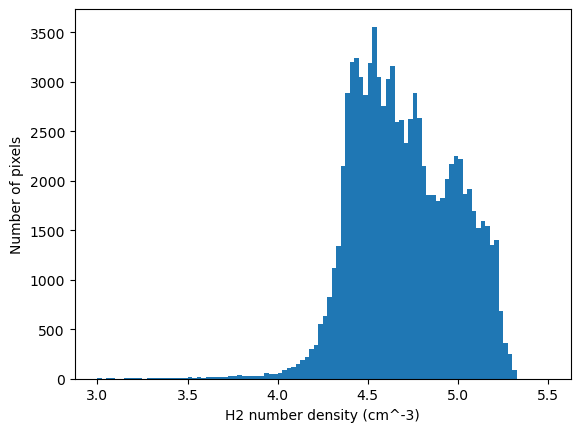

In [6]:
# plot histogram of values
plt.hist(np.log10(n_H2.value.flatten()), bins=100, range=(3, 5.5))
plt.xlabel('H2 number density (cm^-3)')
plt.ylabel('Number of pixels')
plt.show()

In [15]:
hdu_N_H2 = fits.PrimaryHDU(N_H2.value, header=header_msd)
hdu_n_H2 = fits.PrimaryHDU(n_H2.value, header=header_msd)

hdu_N_H2.writeto("./data/coldense_H2.fits", overwrite=True)

In [16]:
hdu_n_H2.writeto("./data/numdense_H2.fits", overwrite=True)